In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp2d

In [5]:
from qutip import *

9
[   0.    12.5   25.    37.5   50.    62.5   75.    87.5  100. ]


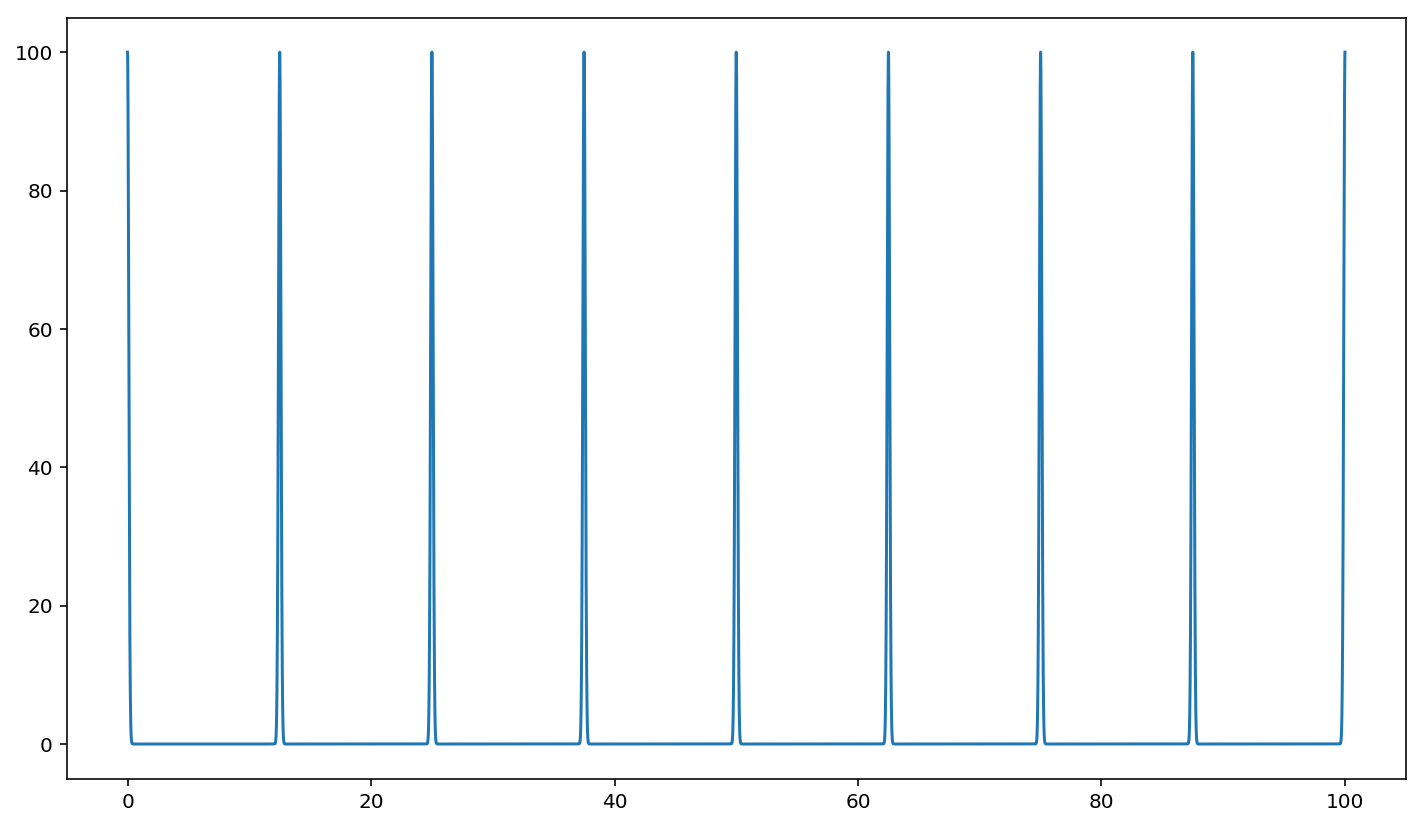

In [6]:
delayRange = 100
numPulses = int(np.floor(delayRange/12.5)+1)
print(numPulses)
pulseInRange = np.floor(delayRange/12.5)*12.5
pulses = np.linspace(0,pulseInRange,numPulses)
print(pulses)

numt = delayRange*10000+1 # number of time elements (resolution 100fs if *10000)
tlist = np.linspace (0, delayRange, numt) #array of time (in ns)
taulist = tlist

#make driving pulsetrain: fs laser, each laser pulse is Gaussian with width 200fs
laserPulsetrain = np.zeros(numt)
#laserPW = 2E-4
laserPW = 0.1
pulseAmplitude = 1/(laserPW**2) # height of laser pulse
for i in range(numPulses):
    thisPulse = pulseAmplitude * np.exp(-(tlist - pulses[i]) ** 2 / (2 * laserPW ** 2))
    laserPulsetrain = laserPulsetrain+thisPulse

fig0, ax0 = plt.subplots(figsize=(12,7))
ax0.plot(tlist,laserPulsetrain)    

In [7]:
# Quantum Mechanics part
gamma = 0.5 # decay parameter
# initial state
psi0_2photon = fock(2, 0) # two-photon ground state
psi0_1photon = fock(1, 0) # two-photon ground state

# operators
sm2 = destroy(2)   # atomic lowering operator
n2 = sm2.dag()*sm2 # number operator

# Hamiltonian
H_I_2photon = sm2 + sm2.dag()
H_2photon = [[H_I_2photon, laserPulsetrain]]

# collapse operator that describes dissipation
c_ops2= [np.sqrt(gamma) * sm2] # represents spontaneous emission

sm1 = destroy(1) # atomic lowering operator
n1 = sm1.dag()*sm1 # number operator

# Hamiltonian
H_I_1photon = sm1 + sm1.dag()
H_1photon = [[H_I_1photon, laserPulsetrain]]

# collapse operator that describes dissipation
c_ops1= [np.sqrt(gamma) * sm1] # represents spontaneous emission

In [8]:
n_2photon = mesolve(H_2photon, psi0_2photon, tlist, c_ops2, n2).expect[0]
n_1photon = mesolve(H_1photon, psi0_1photon, tlist, c_ops1, n1).expect[0]

TypeError: Incorrect specification of time-dependent Hamiltonian (expected operator or superoperator)

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.plot(tlist, n_2photon, 'r', label="2 photon Fock state")
ax1.legend()
ax1.set_xlabel('Time, $t$ [ns]')
ax1.set_ylabel('Emission flux [$\gamma$]')
ax1.set_title('TLS emission shapes');
#ax1.set_xlim(50, 70)
print(np.max(n_2photon))